> Importing necessary library.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

> Loading datasets.

In [2]:
# --> new_appD == application_data_new

application_data_new = new_appD = pd.read_csv("Data/application_data_new.csv")
new_appD.head(10)

,SK_ID_CURR,TARGET,lokl,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,100002,1,1,Cash loans,M,202500,406598,24701.0,351000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers
1,100003,0,1,Cash loans,F,270000,1293503,35699.0,1129500.0,State servant,Higher education,Married,House or apartment,Core staff
2,100004,0,1,Revolving loans,M,67500,135000,6750.0,135000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers
3,100006,0,1,Cash loans,F,135000,312683,29687.0,297000.0,Working,Secondary or secondary special,Civil marriage,House or apartment,Laborers
4,100007,0,1,Cash loans,M,121500,513000,21866.0,513000.0,Working,Secondary or secondary special,Single,House or apartment,Core staff
5,100008,0,1,Cash loans,M,99000,490496,27518.0,454500.0,State servant,Secondary or secondary special,Married,House or apartment,Laborers
6,100009,0,1,Cash loans,F,171000,1560726,41301.0,1395000.0,Commercial associate,Higher education,Married,House or apartment,Accountants
7,100012,0,1,Revolving loans,M,135000,405000,20250.0,405000.0,Working,Secondary or secondary special,Single,House or apartment,Laborers
8,100016,0,1,Cash loans,F,67500,80865,5882.0,67500.0,Working,Secondary or secondary special,Married,House or apartment,Laborers
9,100017,0,1,Cash loans,M,225000,918468,28967.0,697500.0,Working,Secondary or secondary special,Married,House or apartment,Drivers


In [3]:
# new_desc = pd.read_csv("Data\columns_description.csv", encoding='unicode_escape')
# This csv file contains the description to understand all the column variables from new_appD and new_prev_appD dataset.

In [4]:
# --> new_prev_appD == previous_application_new

previous_application_new = new_prev_appD = pd.read_csv("Data/previous_application_new.csv")
new_prev_appD.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS
0,2030495,271877,Consumer loans,1730,17145,17145,0,17145,Approved
1,2802425,108129,Cash loans,25189,607500,679671,0,607500,Approved
2,2523466,122040,Cash loans,15061,112500,136445,0,112500,Approved
3,2819243,176158,Cash loans,47041,450000,470790,0,450000,Approved
4,1784265,202054,Cash loans,31924,337500,404055,0,337500,Refused
5,1383531,199383,Cash loans,23704,315000,340574,0,315000,Approved
6,1715995,447712,Cash loans,11369,270000,335754,0,270000,Approved
7,2257824,161140,Cash loans,13833,211500,246398,0,211500,Approved
8,2330894,258628,Cash loans,12165,148500,174362,0,148500,Approved
9,1232483,151612,Consumer loans,21307,126491,119853,12650,126491,Approved


> Data analysis of 'new_appD' dataset.

In [5]:
print(new_appD.shape)

(276480, 14)


In [6]:
new_appD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276480 entries, 0 to 276479
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SK_ID_CURR           276480 non-null  int64  
 1   TARGET               276480 non-null  int64  
 2   lokl                 276480 non-null  int64  
 3   NAME_CONTRACT_TYPE   276480 non-null  object 
 4   CODE_GENDER          276480 non-null  object 
 5   AMT_INCOME_TOTAL     276480 non-null  int64  
 6   AMT_CREDIT           276480 non-null  int64  
 7   AMT_ANNUITY          276468 non-null  float64
 8   AMT_GOODS_PRICE      276231 non-null  float64
 9   NAME_INCOME_TYPE     276480 non-null  object 
 10  NAME_EDUCATION_TYPE  276480 non-null  object 
 11  NAME_FAMILY_STATUS   276480 non-null  object 
 12  NAME_HOUSING_TYPE    276480 non-null  object 
 13  OCCUPATION_TYPE      276480 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 29.5+ MB


In [7]:
#   7   AMT_ANNUITY          276468 non-null  float64
#   8   AMT_GOODS_PRICE      276231 non-null  float64

# --> This two columns having less counts w.r.to others. 
# --> So there are 'missing values'.

new_appD.isnull().sum()

SK_ID_CURR               0
TARGET                   0
lokl                     0
NAME_CONTRACT_TYPE       0
CODE_GENDER              0
AMT_INCOME_TOTAL         0
AMT_CREDIT               0
AMT_ANNUITY             12
AMT_GOODS_PRICE        249
NAME_INCOME_TYPE         0
NAME_EDUCATION_TYPE      0
NAME_FAMILY_STATUS       0
NAME_HOUSING_TYPE        0
OCCUPATION_TYPE          0
dtype: int64

>> Checking 'Missing Values' and handling them.

In [8]:
new_appD_missing = new_appD["AMT_ANNUITY"].isnull() | new_appD["AMT_GOODS_PRICE"].isnull()
(new_appD[new_appD_missing])

# --> As this output only shows the data containg missing values w.r.to other columns.
# --> From ["AMT_ANNUITY"] and ["AMT_GOODS_PRICE"] i.e., 12 + 249 = 261 rows.

,SK_ID_CURR,TARGET,lokl,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
442,100837,0,1,Revolving loans,F,45000,135000,6750.0,NaN,Commercial associate,Secondary or secondary special,Married,House or apartment,Core staff
3543,106955,0,1,Revolving loans,F,157500,450000,22500.0,NaN,Working,Secondary or secondary special,Married,House or apartment,Private service staff
3839,107494,0,1,Revolving loans,F,67500,202500,10125.0,NaN,Working,Higher education,Married,House or apartment,Accountants
3994,107822,0,1,Revolving loans,F,121500,180000,9000.0,NaN,Working,Secondary or secondary special,Civil marriage,House or apartment,Managers
4547,108913,0,1,Revolving loans,M,180000,450000,22500.0,NaN,Working,Higher education,Single,House or apartment,Security staff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271538,438322,0,1,Revolving loans,F,90000,270000,13500.0,NaN,Commercial associate,Higher education,Single,House or apartment,No Occupation
271566,438413,0,1,Revolving loans,F,76500,202500,10125.0,NaN,Working,Secondary or secondary special,Single,House or apartment,No Occupation
274996,450959,0,1,Revolving loans,F,126000,337500,16875.0,NaN,Working,Secondary or secondary special,Widow,House or apartment,No Occupation
275537,452926,0,1,Revolving loans,F,90000,247500,12375.0,NaN,Pensioner,Secondary or secondary special,Widow,House or apartment,No Occupation


In [9]:
new_appD["AMT_ANNUITY"].fillna(new_appD["AMT_ANNUITY"].median(), inplace=True)
new_appD["AMT_GOODS_PRICE"].fillna(new_appD["AMT_GOODS_PRICE"].mean(), inplace=True)

# --> Here we applied the common statistical technique to fill the missing values.

In [10]:
# --> Lets check now the null/missing values.
print(new_appD.isnull().sum())

# --> Thus, there is no null/missing values now.

SK_ID_CURR             0
TARGET                 0
lokl                   0
NAME_CONTRACT_TYPE     0
CODE_GENDER            0
AMT_INCOME_TOTAL       0
AMT_CREDIT             0
AMT_ANNUITY            0
AMT_GOODS_PRICE        0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
OCCUPATION_TYPE        0
dtype: int64


In [11]:
new_appD["SK_ID_CURR"].value_counts().unique()

# --> So client Ids "SK_ID_Curr" has all unique values that means, no duplicate Id's.

array([1], dtype=int64)

In [12]:
new_appD["TARGET"].value_counts()

TARGET
0    254167
1     22313
Name: count, dtype: int64

In [13]:
# Target variable ( 1 - client with payment difficulties: 
#                       he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 
#                   0 - all other cases)

# --> It shows, count of '22313' client having issues with loan payments.

In [14]:
print("(In %)", round(new_appD["TARGET"].value_counts() / new_appD["TARGET"].size * 100, 2))

(In %) TARGET
0    91.93
1     8.07
Name: count, dtype: float64


In [15]:
# --> The percentage ratio shows, this as an 'Imbalance variable'.

In [16]:
new_appD.describe()

,SK_ID_CURR,TARGET,lokl,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE
count,276480.000000,276480.000000,276480.0,2.764800e+05,2.764800e+05,276480.000000,2.764800e+05
mean,278230.126595,0.080704,1.0,1.673127e+05,5.923788e+05,26970.109776,5.321236e+05
std,102810.910324,0.272380,0.0,2.455049e+05,3.938030e+05,14189.280097,3.606380e+05
min,100002.000000,0.000000,1.0,2.565000e+04,4.500000e+04,1616.000000,4.050000e+04
25%,189221.750000,0.000000,1.0,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05
50%,278337.500000,0.000000,1.0,1.440000e+05,5.094000e+05,24836.000000,4.500000e+05
75%,367214.250000,0.000000,1.0,2.025000e+05,8.086500e+05,34511.000000,6.795000e+05
max,456255.000000,1.000000,1.0,1.170000e+08,4.050000e+06,230162.000000,4.050000e+06


In [17]:
obj_cols = ["NAME_CONTRACT_TYPE", "CODE_GENDER", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE",
            "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE", "OCCUPATION_TYPE"]

for col in obj_cols:
    categories = new_appD.groupby(col,).size()
    print(categories, end = "\n----------\n")

# --> This will show the categorial columns and its description with values and count size.

NAME_CONTRACT_TYPE
Cash loans         251870
Revolving loans     24610
dtype: int64
----------
CODE_GENDER
F      184190
M       92286
XNA         4
dtype: int64
----------
NAME_INCOME_TYPE
Businessman                  2
Commercial associate     61350
Maternity leave              3
Pensioner                55362
State servant            19050
Student                     12
Unemployed                  22
Working                 140679
dtype: int64
----------
NAME_EDUCATION_TYPE
Academic degree                      154
Higher education                   64641
Incomplete higher                   9012
Lower secondary                     3540
Secondary or secondary special    199133
dtype: int64
----------
NAME_FAMILY_STATUS
Civil marriage     26664
Married           176742
Separated          17931
Single             39727
Widow              15416
dtype: int64
----------
NAME_HOUSING_TYPE
Co-op apartment          1006
House or apartment     245693
Municipal apartment     10200
Office apartm

> Data analysis of 'new_prev_appD' dataset.

In [18]:
new_prev_appD.shape

(664066, 9)

In [19]:
new_prev_appD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664066 entries, 0 to 664065
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   SK_ID_PREV            664066 non-null  int64 
 1   SK_ID_CURR            664066 non-null  int64 
 2   NAME_CONTRACT_TYPE    664066 non-null  object
 3   AMT_ANNUITY           664066 non-null  int64 
 4   AMT_APPLICATION       664066 non-null  int64 
 5   AMT_CREDIT            664066 non-null  int64 
 6   AMT_DOWN_PAYMENT      664066 non-null  int64 
 7   AMT_GOODS_PRICE       664066 non-null  int64 
 8   NAME_CONTRACT_STATUS  664066 non-null  object
dtypes: int64(7), object(2)
memory usage: 45.6+ MB


In [20]:
# --> As all columns having same no. of counts. 
# --> So there is no 'missing values'.

new_prev_appD.isnull().sum()

SK_ID_PREV              0
SK_ID_CURR              0
NAME_CONTRACT_TYPE      0
AMT_ANNUITY             0
AMT_APPLICATION         0
AMT_CREDIT              0
AMT_DOWN_PAYMENT        0
AMT_GOODS_PRICE         0
NAME_CONTRACT_STATUS    0
dtype: int64

In [21]:
new_prev_appD["SK_ID_PREV"].value_counts().unique()

# --> So client Ids "SK_ID_Prev" has all unique values that means, no duplicate Id's.

array([1], dtype=int64)

In [22]:
new_prev_appD["SK_ID_CURR"].value_counts().unique()

# --> In this "SK_ID_CURR" has many duplicate Id's.

array([47, 39, 35, 34, 33, 32, 29, 28, 27, 25, 24, 23, 22, 21, 20, 19, 18,
       17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1],
      dtype=int64)

> Univariate visualization 
>> For new_appD.

In [23]:
display(new_appD.select_dtypes(include = 'object').describe())

# --> "This shows simple statistics of the Object type column.

,NAME_CONTRACT_TYPE,CODE_GENDER,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,276480,276480,276480,276480,276480,276480,276480
unique,2,3,8,5,5,6,19
top,Cash loans,F,Working,Secondary or secondary special,Married,House or apartment,No Occupation
freq,251870,184190,140679,199133,176742,245693,96391


In [24]:
display(new_appD.select_dtypes(include = int).describe())

# --> "This shows simple statistics of the Interger type column.

,SK_ID_CURR,TARGET,lokl,AMT_INCOME_TOTAL,AMT_CREDIT
count,276480.000000,276480.000000,276480.0,2.764800e+05,2.764800e+05
mean,278230.126595,0.080704,1.0,1.673127e+05,5.923788e+05
std,102810.910324,0.272380,0.0,2.455049e+05,3.938030e+05
min,100002.000000,0.000000,1.0,2.565000e+04,4.500000e+04
25%,189221.750000,0.000000,1.0,1.125000e+05,2.700000e+05
50%,278337.500000,0.000000,1.0,1.440000e+05,5.094000e+05
75%,367214.250000,0.000000,1.0,2.025000e+05,8.086500e+05
max,456255.000000,1.000000,1.0,1.170000e+08,4.050000e+06


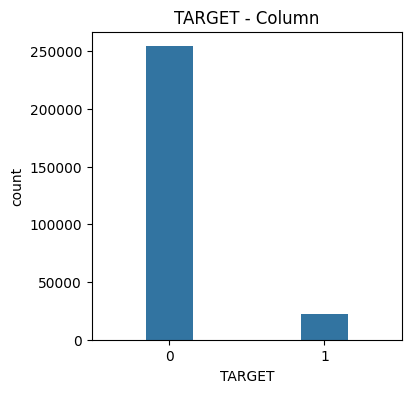

In [25]:
plt.figure(figsize=(4,4))
sns.countplot(data = new_appD, x = "TARGET", legend='auto', width = 0.3)
plt.title("TARGET - Column")
plt.show()

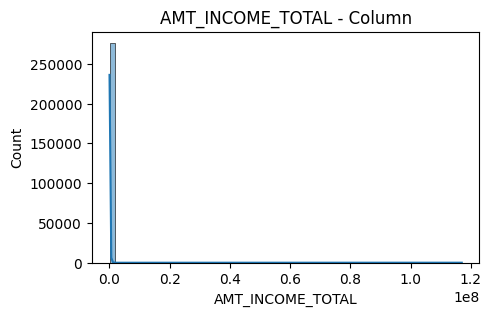

In [26]:
plt.figure(figsize=(5,3))
sns.histplot(new_appD["AMT_INCOME_TOTAL"], bins = 60, kde=True)
plt.title("AMT_INCOME_TOTAL - Column")
plt.show()

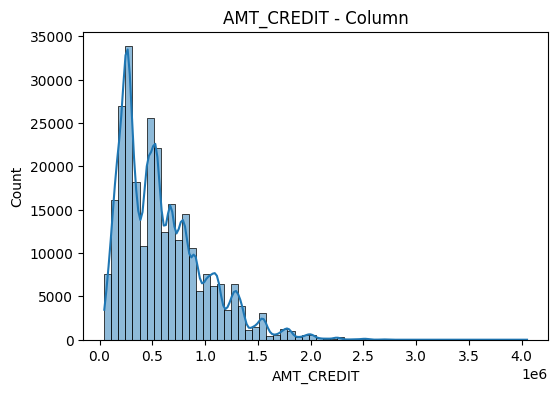

In [27]:
plt.figure(figsize=(6,4))
sns.histplot(new_appD["AMT_CREDIT"], bins = 60, kde=True)
plt.title("AMT_CREDIT - Column")
plt.show()

> Univariate visualization 
>> For new_pre_appD.

In [28]:
display(new_prev_appD.select_dtypes(include = int).describe())

# --> "This shows simple statistics of the Integer type column.

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE
count,6.640660e+05,664066.000000,664066.000000,6.640660e+05,6.640660e+05,6.640660e+05,6.640660e+05
mean,1.913498e+06,278595.764566,15923.619984,2.307181e+05,2.467526e+05,4.197126e+03,2.307421e+05
std,5.345045e+05,102834.116102,14849.862994,3.176530e+05,3.460784e+05,1.635290e+04,3.176697e+05
min,1.000001e+06,100002.000000,580.000000,5.400000e+03,5.139000e+03,-1.000000e+00,5.400000e+03
25%,1.445452e+06,189517.000000,6259.000000,5.179500e+04,5.051300e+04,0.000000e+00,5.179500e+04
50%,1.910116e+06,279184.000000,11250.000000,1.125000e+05,1.135710e+05,0.000000e+00,1.125000e+05
75%,2.377386e+06,367692.000000,20336.000000,2.385000e+05,2.695500e+05,3.938000e+03,2.385000e+05
max,2.845379e+06,456255.000000,418058.000000,4.050000e+06,4.104351e+06,2.150100e+06,4.050000e+06


In [29]:
display(new_prev_appD.select_dtypes(include = 'object').describe())

# --> "This shows simple statistics of the Object type column.

,NAME_CONTRACT_TYPE,NAME_CONTRACT_STATUS
count,664066,664066
unique,3,4
top,Consumer loans,Approved
freq,374610,532863


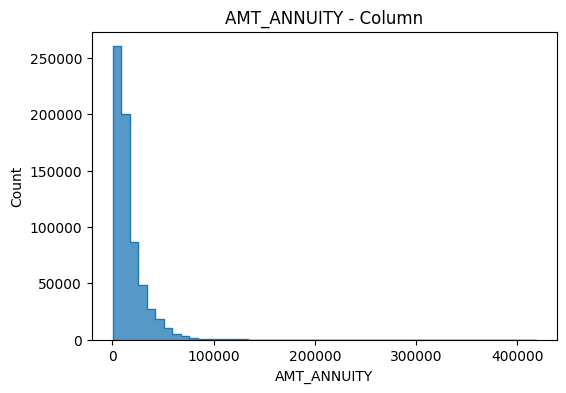

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(new_prev_appD["AMT_ANNUITY"], bins = 50, element = 'step')
plt.title("AMT_ANNUITY - Column")
plt.show()

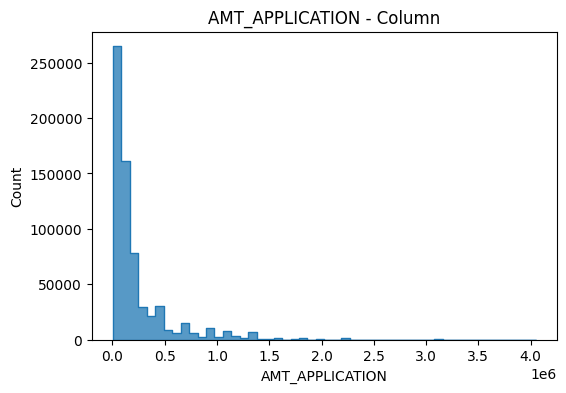

In [31]:
plt.figure(figsize=(6,4))
sns.histplot(new_prev_appD["AMT_APPLICATION"], bins = 50, element = 'step')
plt.title("AMT_APPLICATION - Column")
plt.show()

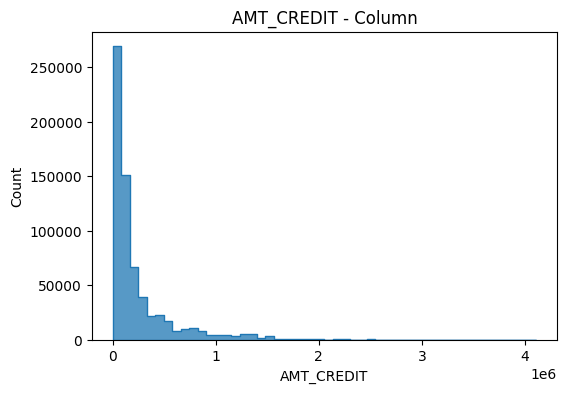

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(new_prev_appD["AMT_CREDIT"], bins = 50, element = 'step')
plt.title("AMT_CREDIT - Column")
plt.show()

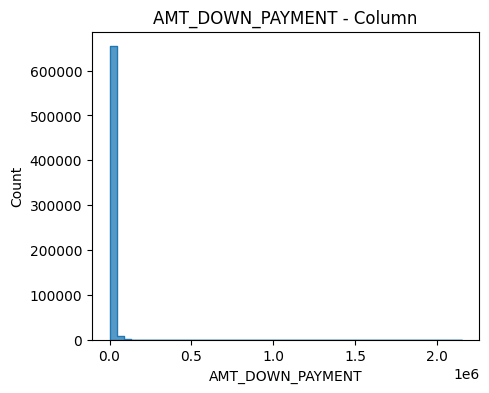

In [33]:
plt.figure(figsize=(5,4))
sns.histplot(new_prev_appD["AMT_DOWN_PAYMENT"], bins = 50, element = 'step')
plt.title("AMT_DOWN_PAYMENT - Column")
plt.show()

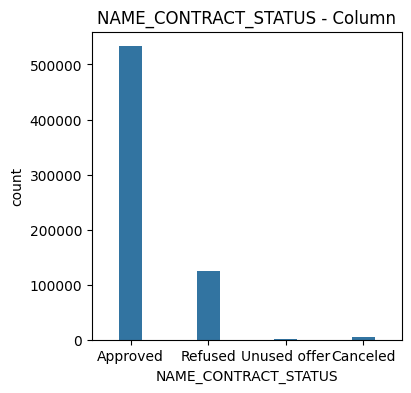

In [34]:
plt.figure(figsize=(4,4))
sns.countplot(data = new_prev_appD, x = "NAME_CONTRACT_STATUS", legend='auto', width = 0.3)
plt.title("NAME_CONTRACT_STATUS - Column")
plt.show()

> Bivariate visualizations
>> For new_appD.

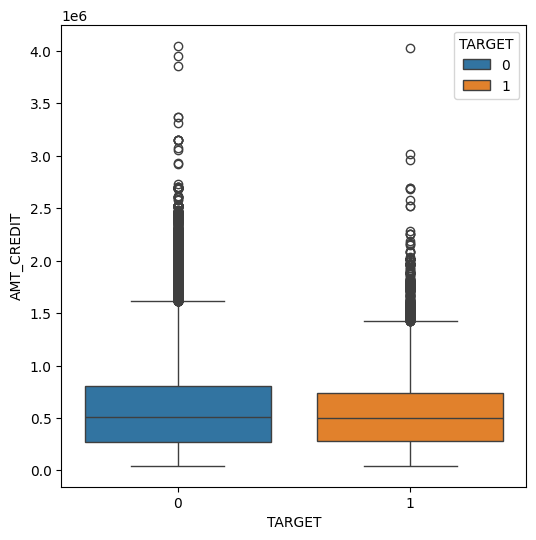

In [35]:
plt.figure(figsize=(6,6))
sns.boxplot(data = new_appD, x = new_appD["TARGET"], y = new_appD["AMT_CREDIT"], hue = "TARGET")
plt.show()

In [36]:
# --> For checking correlation, selecting only columns having numbers 

appD_int = new_appD.select_dtypes(include = 'number')
#only_obj = new_appD.select_dtypes(include = 'object')

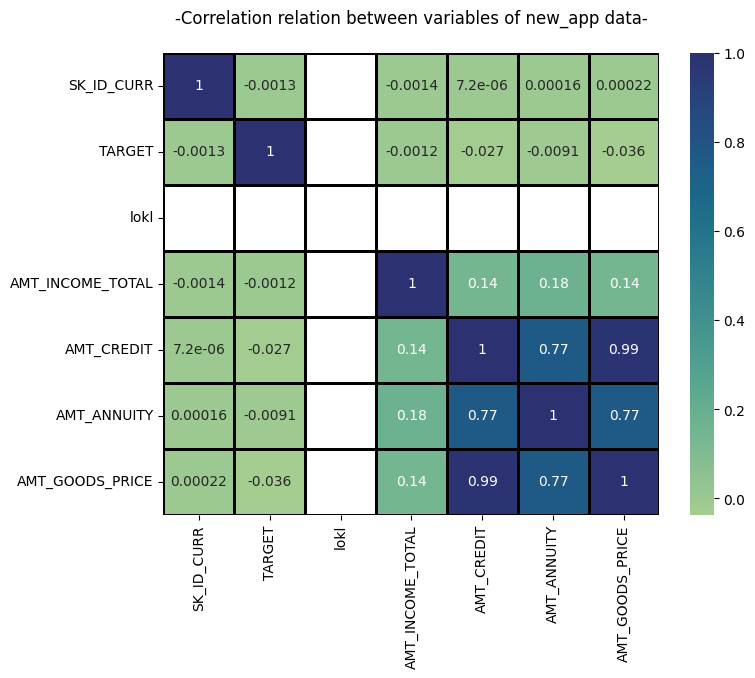

In [37]:
plt.figure(figsize=(8,6))
sns.heatmap(appD_int.corr(), annot = True, cmap = 'crest', linecolor = 'black', linewidths = 0.8)
plt.title("-Correlation relation between variables of new_app data-\n")
plt.show()

> Bivariate visualizations
>> For new_prev_appD.

In [38]:
# --> For checking correlation, selecting only columns having numbers 

prev_appD_int = new_prev_appD.select_dtypes(include = 'number')
#only_obj = new_appD.select_dtypes(include = 'object')

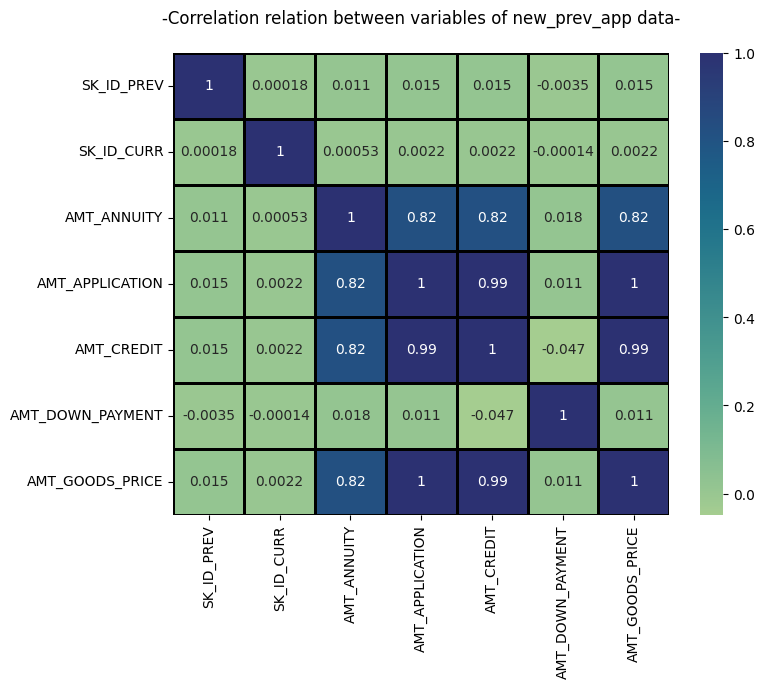

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(prev_appD_int.corr(), annot = True, cmap = 'crest', linecolor = 'black', linewidths = 0.8)
plt.title("-Correlation relation between variables of new_prev_app data-\n")
plt.show()

> Merging dataset

In [40]:
new_appD.copy()
new_prev_appD.copy()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,NAME_CONTRACT_STATUS
0,2030495,271877,Consumer loans,1730,17145,17145,0,17145,Approved
1,2802425,108129,Cash loans,25189,607500,679671,0,607500,Approved
2,2523466,122040,Cash loans,15061,112500,136445,0,112500,Approved
3,2819243,176158,Cash loans,47041,450000,470790,0,450000,Approved
4,1784265,202054,Cash loans,31924,337500,404055,0,337500,Refused
...,...,...,...,...,...,...,...,...,...
664061,2513664,340111,Consumer loans,10477,98042,96971,9806,98042,Approved
664062,2230795,255000,Consumer loans,50978,210960,189864,21096,210960,Refused
664063,1730537,429268,Consumer loans,5793,38070,36527,3807,38070,Approved
664064,2100360,389043,Consumer loans,4775,35357,30110,7110,35357,Approved


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687078 entries, 0 to 687077
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SK_ID_CURR            687078 non-null  int64  
 1   TARGET                687078 non-null  int64  
 2   lokl                  687078 non-null  int64  
 3   NAME_CONTRACT_TYPE_x  687078 non-null  object 
 4   CODE_GENDER           687078 non-null  object 
 5   AMT_INCOME_TOTAL      687078 non-null  int64  
 6   AMT_CREDIT_x          687078 non-null  int64  
 7   AMT_ANNUITY_x         687078 non-null  float64
 8   AMT_GOODS_PRICE_x     687078 non-null  float64
 9   NAME_INCOME_TYPE      687078 non-null  object 
 10  NAME_EDUCATION_TYPE   687078 non-null  object 
 11  NAME_FAMILY_STATUS    687078 non-null  object 
 12  NAME_HOUSING_TYPE     687078 non-null  object 
 13  OCCUPATION_TYPE       687078 non-null  object 
 14  SK_ID_PREV            664066 non-null  float64
 15  

None

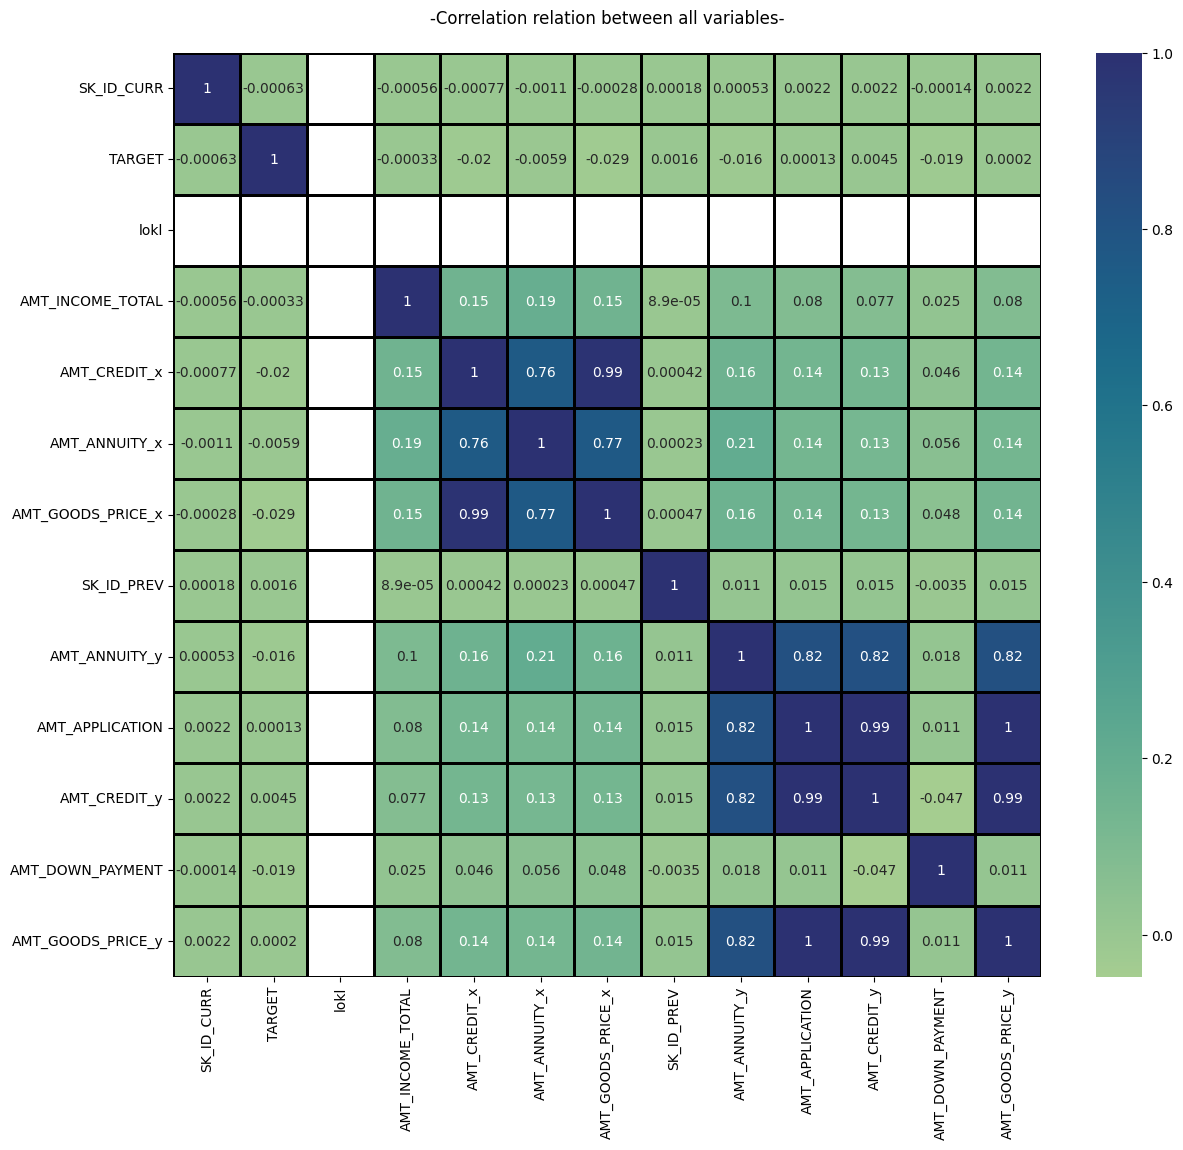

In [41]:
merged_data_left = pd.merge(new_appD, new_prev_appD, on='SK_ID_CURR', how='left')
display(merged_data_left.info())
int_merged_data_left = merged_data_left.select_dtypes(include='number')

plt.figure(figsize=(14,12))
sns.heatmap(int_merged_data_left.corr(), annot = True, cmap = 'crest', linecolor = 'black', linewidths = 0.8)
plt.title("-Correlation relation between all variables-\n")
plt.show()

# After merging the two dataframe having duplicates values